# COM 308 Final Paper Code
Mark Klinchin

A20439135

This is the code used for the final paper for the COM308 project

## Installing Prerequisite Package

In [ ]:
!pip install datasets

## Importing and Cleaning Datasets to be Used

### All non-Onion Sources

In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_colwidth', 100)

Below we see a list of the publications in our first dataset, along with how many headlines from each publication. We see there are ten publications represented, each with 1,000 headlines. Three of the publications are satitical, while the other seven are not

In [ ]:
from datasets import load_dataset

dataset = load_dataset("phosseini/multimodal_satire")

In [ ]:
from math import e
df = pd.DataFrame(dataset['train'])
df = df.drop(columns=['image_link'])
urls = df['url']

sites = {}

for url in urls:
  parts = url.split("/")
  site = parts[2]
  #print(site)
  if(site not in sites):
    sites[site] = 1
  else:
    sites[site] +=1
print(sites)

{'babylonbee.com': 1000, 'clickhole.com': 1000, 'waterfordwhispersnews.com': 1000, 'thedailyer.com': 1000, 'thehill.com': 1000, 'www.politico.com': 1000, 'nypost.com': 1000, 'www.huffpost.com': 1000, 'www.vice.com': 1000, 'www.reuters.com': 1000}


### From The Onion

In [ ]:
onionds = load_dataset("Biddls/Onion_News")

In [ ]:
onion = pd.DataFrame(onionds['train'])

headlines = []

for i in onion['text']:
  #print(i.split("#~#")[0])
  headlines.append(i.split(" #~#")[0])
#headlines

onion['headline'] = headlines
onion['is_satire'] = 1
onion['publication'] = "The Onion"
onion = onion.drop(columns=['text'])
onion

,headline,is_satire,publication
0,Relaxed Marie Kondo Now Says She Perfectly Happy Living In Waist-High Sewage,1,The Onion
1,U.S. Officials Call For Correct Amount Of Violence,1,The Onion
2,Kamala Harris Asks Communications Assistant If She Can Take Them Out For Coffee And Pick Their B...,1,The Onion
3,25 Arrested In Fake Nursing School Diploma Scheme,1,The Onion
4,World’s Oldest American Dies At 72,1,The Onion
...,...,...,...
33875,The Cobain Diaries,1,The Onion
33876,Video-Camera Tips,1,The Onion
33877,Surgeon General Mills Recommends Three To Five Servings Of Froot Per Day,1,The Onion
33878,Report: Presidents Washington Through Bush May Have Lied About Key Matters,1,The Onion


We only seek to sample 1,000 Onion headlines, in order not to make the dataset imbalanced. We randomly sample (using a seed for debugging consistnecy).

In [ ]:
onion1k = onion.sample(1000,random_state=60616)

### Continuing Data Cleaning

In [ ]:
publications = []
urls = df['url']

for url in urls:
  parts = url.split("/")
  site = parts[2]
  #print(site)
  publications.append(site)

df['publication'] = publications
df

,url,headline,is_satire,publication
0,https://babylonbee.com/news/this-aint-it-chief-updated-to-this-aint-it-noble-indigenous-tribal-l...,"'This Ain’t It, Chief' Updated To 'This Ain’t It, Noble Indigenous Tribal Leader'",1,babylonbee.com
1,https://babylonbee.com/news/announcement-the-babylon-bee-will-now-only-write-positive-articles-i...,Using Our Prophetic Powers For Good: The Babylon Bee Will Now Only Write Articles About Positive...,1,babylonbee.com
2,https://babylonbee.com/news/study-wearing-a-mask-increases-your-risk-of-being-a-big-sissy,Study Finds Connection Between Wearing A Mask And Being A Big Sissy,1,babylonbee.com
3,https://babylonbee.com/news/benny-hinn-flies-private-jet-to-dagobah-to-train-his-force-powers,Benny Hinn Travels To Dagobah To Master His Power To Knock People Over,1,babylonbee.com
4,https://babylonbee.com/news/white-house-adds-cry-room-for-fussy-reporters,White House Adds Cry Room For Fussy Reporters,1,babylonbee.com
...,...,...,...,...
9995,https://www.reuters.com/article/us-health-coronavirus-retail-inventories/sell-stow-or-dump-retai...,"Sell, stow or dump? Retailers wrestle with mountain of unsold stock",0,www.reuters.com
9996,https://www.reuters.com/article/us-usa-economy-protests/george-floyd-protests-recall-earlier-ten...,"George Floyd protests recall earlier tensions, promises of economic change",0,www.reuters.com
9997,https://www.reuters.com/article/us-minneapolis-police-new-york-cuomo/new-york-city-institutes-cu...,"New York City institutes curfew, Governor Cuomo calls for police reforms",0,www.reuters.com
9998,https://www.reuters.com/article/us-minneapolis-police-protests-trump/trump-illinois-governor-spa...,"Trump, Illinois governor spar during call over get-tough talk",0,www.reuters.com


In [ ]:
df = df.drop(columns=['url'])

In [ ]:
df2 = df[(df['publication']=='babylonbee.com') | (df['publication']=='clickhole.com') | (df['publication']=='thehill.com') | (df['publication']=='www.politico.com') | (df['publication']=='www.huffpost.com')]
df2

,headline,is_satire,publication
0,"'This Ain’t It, Chief' Updated To 'This Ain’t It, Noble Indigenous Tribal Leader'",1,babylonbee.com
1,Using Our Prophetic Powers For Good: The Babylon Bee Will Now Only Write Articles About Positive...,1,babylonbee.com
2,Study Finds Connection Between Wearing A Mask And Being A Big Sissy,1,babylonbee.com
3,Benny Hinn Travels To Dagobah To Master His Power To Knock People Over,1,babylonbee.com
4,White House Adds Cry Room For Fussy Reporters,1,babylonbee.com
...,...,...,...
7995,Brand-New Lamborghini Totaled After Just 20 Minutes On The Road,0,www.huffpost.com
7996,Federal Judge Orders U.S. To Release Migrant Children During Pandemic,0,www.huffpost.com
7997,Scientists Just Beginning To Understand The Many Health Problems Caused By Covid-19,0,www.huffpost.com
7998,Russia Offered Afghan Militants Bounties To Kill U.S. Troops: Reports,0,www.huffpost.com


In [ ]:
data = pd.concat([df2, onion1k]).reset_index(drop=True)
data

,headline,is_satire,publication
0,"'This Ain’t It, Chief' Updated To 'This Ain’t It, Noble Indigenous Tribal Leader'",1,babylonbee.com
1,Using Our Prophetic Powers For Good: The Babylon Bee Will Now Only Write Articles About Positive...,1,babylonbee.com
2,Study Finds Connection Between Wearing A Mask And Being A Big Sissy,1,babylonbee.com
3,Benny Hinn Travels To Dagobah To Master His Power To Knock People Over,1,babylonbee.com
4,White House Adds Cry Room For Fussy Reporters,1,babylonbee.com
...,...,...,...
5995,What To Know About Trump’s Justice Department Seeking Info On His Enemies,1,The Onion
5996,International Climate Conference Kicks Off In Poland,1,The Onion
5997,"Child Entertained For 5 Minutes By Plastic Toy That Will Take 1,000 Years To Biodegrade",1,The Onion
5998,"FDA Eases Restrictions On Blood Donations From Gay, Bisexual Men",1,The Onion


In [ ]:
pubs = data['publication']

sites = {}

for pub in pubs:
  if(pub not in sites):
    sites[pub] = 1
  else:
    sites[pub] +=1
print(sites)

{'babylonbee.com': 1000, 'clickhole.com': 1000, 'thehill.com': 1000, 'www.politico.com': 1000, 'www.huffpost.com': 1000, 'The Onion': 1000}


Above we have added the headlines from *The Onion*, and removed headlines from publictions we do not plan to use

The shortlist of publications we will use for this study are:

1.   The Onion (Satire)
2.   The Babylon Bee (Satire)
3.   Clickhole (Satire)
4.   The Hill (Serious)
5.   Politico (Serious)
6.   The Huffington Post (Serious)

There are 1,000 headlines from each, making our dataset 6,000 headlines from a perfectly balanced split of satirical and serious headlines.   


## Data Preprocessing

In [ ]:
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
import string

Here we define functions to "clean" the data, which in this context means to strip the data of elements that make it harder for the algorithm to process the words.

In the "decontracted" function, we replace as many contractions as we can with their un-contracted counterparts. This needs to happen first in order to remove the punctuation from contractions, as all other punctuations will we removed rather than replaced

The function "clean_text" calls "decontracted", then removes URL's, HTML tags, and emails, then removes characters that aren't the standard alphabetic A-Z characters, then finally removes all punctuation characters. What's left as a result of this function is a set of text that is just a group of words seperated by spaces, which while it does remove the nuance of the language, removes little enough of it to make it worth the processing to help the classifier out.

In [ ]:
def decontracted(phrase):
    #Edge cases
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"ain\'t", "aint", phrase)


    #General contractions
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase) # prime
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    return phrase

def clean_text(df):
    cleaned_review = []

    for review_text in tqdm(df['headline']):

        # expand the contracted words
        review_text = decontracted(review_text)

        #remove html tags
        review_text = BeautifulSoup(review_text, 'lxml').get_text().strip() # re.sub(r'<.*?>', '', text)

        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)

        #remove url and emails
        review_text = re.sub(r'https?://\S+|www\.\S+', '', review_text)
        review_text = re.sub(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', review_text)

        #Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
        review_text = review_text.translate(str.maketrans('', '', string.punctuation))

        cleaned_review.append(review_text)

    return cleaned_review

Now we call this function on all headlines

In [ ]:
#Clean headlines using function defined above
data['clean_headline'] = clean_text(data)

  0%|          | 0/6000 [00:00<?, ?it/s]<ipython-input-15-a38dc941e256>:29: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review_text, 'lxml').get_text().strip() # re.sub(r'<.*?>', '', text)
100%|██████████| 6000/6000 [00:01<00:00, 5171.21it/s]


And here are a few examples, randomly sampled. While this is not perfect, it deals with most of the issues, and with a bit more refinement (which was not done in the interest of time) it can be made nearly perfectly accurate

In [ ]:
#Show first few examples
data.sample(10)

,headline,is_satire,publication,clean_headline
5435,Man Just Can’t Be With Someone Who He Projects So Many Of His Own Flaws Onto,1,The Onion,Man Just Can t Be With Someone Who He Projects So Many Of His Own Flaws Onto
5423,The Best Things We Watched And Read In 2021,1,The Onion,The Best Things We Watched And Read In
5867,ABC On Trial For Defaming Beef,1,The Onion,ABC On Trial For Defaming Beef
3580,French Greens conquer major cities in local elections,0,www.politico.com,French Greens conquer major cities in local elections
981,Trump Reminds Everyone He Hasn't Been Impeached All Decade,1,babylonbee.com,Trump Reminds Everyone He Has not Been Impeached All Decade
1681,Chance the Rapper said WHAT?!,1,clickhole.com,Chance the Rapper said WHAT
2511,Kelly leads McSally by 9 points in Arizona,0,thehill.com,Kelly leads McSally by points in Arizona
5640,Most Used Words In The GOP Debate,1,The Onion,Most Used Words In The GOP Debate
3290,"BIRTHDAY OF THE DAY: Amanda Coyne, speechwriter and senior adviser for Sen. Dan Sullivan (R-Alaska)",0,www.politico.com,BIRTHDAY OF THE DAY Amanda Coyne speechwriter and senior adviser for Sen Dan Sullivan R Alaska
1502,Feminism FTW: This Amazing Body-Positive Instagram Ad Campaign Is Empowering Women To Buy A Bra ...,1,clickhole.com,Feminism FTW This Amazing Body Positive Instagram Ad Campaign Is Empowering Women To Buy A Bra ...


## Count Vectorization

In this section, we convert the words in the article into vectors, on which we can perform calculations with our classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
#My parameters for the vectorizer
my_maxdf = 0.9
my_mindf = 3
my_ngramrangemin = 1
my_ngramrangemax = 3

In [ ]:
#CountVectorizer: Sets text to lowercase, removes stopwords from our list
#Create a vectorizer using countvectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words=stopwords, max_df=my_maxdf, min_df=my_mindf,
                             ngram_range=(my_ngramrangemin,my_ngramrangemax))

In [ ]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=my_maxdf, min_df=my_mindf,
                             ngram_range=(my_ngramrangemin,my_ngramrangemax))

In [ ]:
vectorizer.fit(data.clean_headline)

CountVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 3), stop_words='english')

In [ ]:
#Make sure the feature names are there
vectorizer.get_feature_names_out()[:10]

array(['abandon', 'abandoned', 'abc', 'ability', 'able', 'aboard',
       'abortion', 'abortion ban', 'abortion pill', 'abortions'],
      dtype=object)

In [ ]:
#Convert the cleaned reviews to vectors
X = vectorizer.fit_transform(data.clean_headline)
y = data.is_satire.values

In [ ]:
print("X.shape : ",X.shape)
print("y.shape : ",y.shape)

X.shape :  (6000, 4787)
y.shape :  (6000,)


## Test/Train Split

We randomly partition the data into a seperate "training" and "testing" subset. The idea behind it is that we do not want to test the model on exactly what it was trained on. Therefore, we take reserve a relatively small portion of the data to test our model on. As per convention, this proportion is 20%, meaning we have what's called an "80/20 test/train split". It is randomly selected, but again using a seed for testing purposes

80/20 test/train split. Random State value: 308

In [ ]:
my_test_size = 0.2
my_randomstate = 308

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

train_idx, test_idx = train_test_split(np.arange(data.shape[0]), test_size=my_test_size,
                                       shuffle=True, random_state=my_randomstate)

print("Training examples count:{}".format(len(train_idx)))
print("Testing examples count:{}".format(len(test_idx)))

Training examples count:4800
Testing examples count:1200


In [ ]:
X_train = X[train_idx]
y_train = y[train_idx]

X_test = X[test_idx]
y_test = y[test_idx]

print("Training data: X_train : {}, y_train : {}".format(X_train.shape, y_train.shape))
print("Testing data: X_test : {}, y_test : {}".format(X_test.shape, y_test.shape))

Training data: X_train : (4800, 4787), y_train : (4800,)
Testing data: X_test : (1200, 4787), y_test : (1200,)


## Fit the classifier

Here we fit a classifier on our training data.

The classifier uses a method called "logistic regression", which is discussed more in the report

In [ ]:
from sklearn.linear_model import LogisticRegression

#Fit a logistic regression classifier on the training data and use the default settings
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

#Make predictions on the testing data
y_pred_test = lr_clf.predict(X_test)

In [ ]:
y_predprob_test = lr_clf.predict_proba(X_test)

## Classifier Performance

### Classification Report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       603
           1       0.82      0.86      0.84       597

    accuracy                           0.83      1200
   macro avg       0.84      0.83      0.83      1200
weighted avg       0.84      0.83      0.83      1200



Below is a matrix to summarize the results. Below are the highlighted values of interest

Overall accuracy was 83%, meaning that 83% of the predictions made were correct. This is generally pretty good, although with room for improvement.

For the class "0", which is the serious headlines, the precision was 85%, meaning 85% of the values predicted to be serious ended up being serious. The recall was 81%, meaning that 81% of the serious headlines were predicted correctly.

For the class "1", which is the satirical headlines, the precision was 82%, meaning 82% of the values predicted to be satirical ended up being satirical. The recall was 86%, meaning that 86% of the satirical headlines were predicted correctly.

### ROC Curve

Below is the "ROC" (Receiver Operating Characteristic) Curve, which is a visual representation of the success of the model. The report goes into more detail about how it works, but overall, the fact that the area under the curve is 0.92 indicates that the model works very well.

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = y_predprob_test[:,1], pos_label=1)
roc_auc = auc(fpr, tpr) #Area under the ROC curve

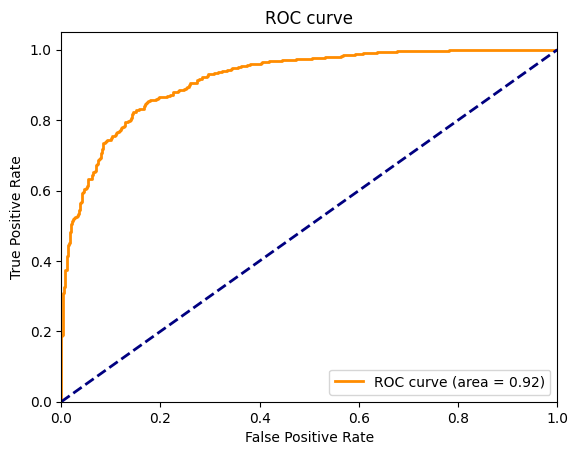

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## Where the Model Fails

Here we try to find a sample of when the model fails, to get a sense of what it uses to predict whether a headline is satirical (and more specifically what does it use that does not work). Here we show the first 20 failed predictions

In [ ]:
df_test = data.iloc[test_idx]
df_test['pred_satire'] = y_pred_test
df_test[df_test['is_satire'] != df_test['pred_satire']].head(20)[['headline','publication','is_satire','pred_satire']]

<ipython-input-39-ed4b2e63cd4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred_satire'] = y_pred_test


,headline,publication,is_satire,pred_satire
260,"Defying Health Orders, Trump To Move Republican Convention To Golden Corral",babylonbee.com,1,0
4089,Here's What Is Worth Getting From Madewell's Latest Summer Sale,www.huffpost.com,0,1
4300,ACLU Orders Full-Page Newspaper Ads Pressing Joe Biden On Abortion Rights,www.huffpost.com,0,1
2987,Connecting the brain to the rest of the body,thehill.com,0,1
4919,"Chase Rice Condemned By Kelsea Ballerini, Critics For 'Enormous Crowd' At TN Concert",www.huffpost.com,0,1
3856,Sign of the times: The return of campaign door knockers,www.politico.com,0,1
4995,Brand-New Lamborghini Totaled After Just 20 Minutes On The Road,www.huffpost.com,0,1
2131,"Blacks, Hispanics less likely to receive stimulus checks quickly: study",thehill.com,0,1
3954,"Treasury, SBA ease path for loan forgiveness after outcry",www.politico.com,0,1
2602,Southwest warns passenger numbers must triple to prevent layoffs,thehill.com,0,1


There doesn't seem to be any noticable patterns among the first few failed predictions. Here are a few observations I have, which are by no means rigorous, but might be interesting:

*   Most of the articles with failed predictions seem to be from the *The Huffington Post* or *The Onion*, although this might just be these first 20. Notably, the publication was not considered for any calculations in the classifier fitting process, and was only kept in the data table for debugging purpsoses and in case this project were to expand to predicting the publication too
*   Most of the headlines from *The Onion*, while a little on the less formal side, seem like plausible serious headlines
*   Conversely, the headlines from *The Huffington Post* could be plausibly satirical


## Top 10 Features for "Satirical" or "Serious" Label

Here we see the top 10 words or phrases that most strongly predict whether an article from the training dataset is satirical

In [ ]:
mytopn = 10

### Serious

In [ ]:
vectorizer.get_feature_names_out()

array(['abandon', 'abandoned', 'abc', ..., 'zoo', 'zoom', 'zuckerberg'],
      dtype=object)

In [ ]:
feature_to_coef = {word: float("%.3f" % coef) for word, coef in zip(vectorizer.get_feature_names_out(), lr_clf.coef_[0])}

print("Top features:")
sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=False)[:mytopn]

Top features:


[('covid', -2.277),
 ('pandemic', -2.268),
 ('gop', -2.063),
 ('federal', -2.027),
 ('july', -1.899),
 ('fauci', -1.752),
 ('racial', -1.711),
 ('pompeo', -1.671),
 ('masks', -1.604),
 ('aid', -1.602)]

Many of the words associated with serious articles seem to be related to the pandemic

### Satirical

In [ ]:
feature_to_coef = {word: float("%.3f" % coef) for word, coef in zip(vectorizer.get_feature_names_out(), lr_clf.coef_[0])}

print("Top features:")
sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:mytopn]

Top features:


[('said', 2.732),
 ('god', 1.63),
 ('church', 1.627),
 ('trump announces', 1.59),
 ('bible', 1.543),
 ('just', 1.476),
 ('onion', 1.429),
 ('thanks', 1.345),
 ('minute', 1.32),
 ('incredible', 1.272)]

Many of the words associated with satirical articles seem to be about the Republican Party or right-wing American politics.

Overall, it seems to be that for this dataset, the classifier might have been using the topic of the article to help differenciate the satirical and the serious articles.

If this project were to be continued, more care would be put into finding and processing the data to help control for the topic and time period (time period is mentioned here becaue during peak pandemic, most likely most articles were written about the pandemic) to help combat this issue and have the classifier focus on the satirical writing style.